<a href="https://www.kaggle.com/code/majidkhanh/bitcoin-price-prediction-using-machine-learning?scriptVersionId=136840510" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Bitcoin Price Prediction Using Machine Learning

![Image of Bicoin](https://www.businessandleadership.com/wp-content/uploads/2022/06/bitcoin-market-cap-btc.jpg)

### What Is Bitcoin?
<p align='justify'> Bitcoin (BTC) is a cryptocurrency, a virtual currency designed to act as money and a form of payment outside the control of any one person, group, or entity, thus removing the need for third-party involvement in financial transactions. It is rewarded to blockchain miners for the work done to verify transactions and can be purchased on several exchanges.</p>

## Utilizing libraries and datasets
<p align='justify'> Python libraries simplify data management and streamline both common and intricate operations, requiring only a single line of code. The following libraries are used in this project:</p>

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
```
1. Pandas: By leveraging this library, data frames can be effortlessly loaded into a 2D array structure, enabling streamlined analysis through a plethora of functions.
2. Numpy: With its swift array processing capabilities, Numpy empowers swift execution of extensive computations.
3. Matplotlib/Seaborn: These libraries facilitate the creation of visual representations for effective data visualization. </p>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
# Ignore warnings
import warnings 
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# read the Bitcoin-USD data from 2015 to 2023 date from oline yfinance library and store it in a dataframe
df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1420070400&period2=1672531200&interval=1d&events=history&includeAdjustedClose=true')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2918,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920
2919,2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479
2920,2022-12-30,16641.330078,16643.427734,16408.474609,16602.585938,16602.585938,15929162910
2921,2022-12-31,16603.673828,16628.986328,16517.519531,16547.496094,16547.496094,11239186456
2922,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700


In [4]:
# make index column as date
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


# Data Preprocessing
<p align='justify'> The dataset used in this project is obtained from Kaggle, a platform for predictive modelling and analytics competitions. The dataset contains the following columns:</p>


In [5]:
# check the data types of the columns
df.dtypes


Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
# check the shape of the dataframe
df.shape

(2923, 6)

In [7]:
#  check for null values
df.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# describe the dataframe
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2.923000e+03
mean,13312.691167,13648.265253,12937.024733,13316.712242,13316.712242,1.693324e+10
std,16299.744747,16716.918809,15816.411762,16294.491341,16294.491341,2.008350e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,893.736511,906.599518,860.364014,895.604492,895.604492,1.459140e+08
50%,7397.134277,7535.716797,7233.399414,7397.796875,7397.796875,9.175292e+09
75%,17481.049804,17876.819336,16907.045899,17422.450196,17422.450196,2.861000e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [9]:
# correlation matrix
df.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999505,0.999076,0.998760,0.998760,0.710021
High,0.999505,1.000000,0.998989,0.999448,0.999448,0.713857
Low,0.999076,0.998989,1.000000,0.999359,0.999359,0.701613
Close,0.998760,0.999448,0.999359,1.000000,1.000000,0.708461
Adj Close,0.998760,0.999448,0.999359,1.000000,1.000000,0.708461
Volume,0.710021,0.713857,0.701613,0.708461,0.708461,1.000000


In [10]:
df[df['Close'] == df['Close']].shape, df.shape


((2923, 6), (2923, 6))

### We will analyze the closing price as we need it to perform the prediction.

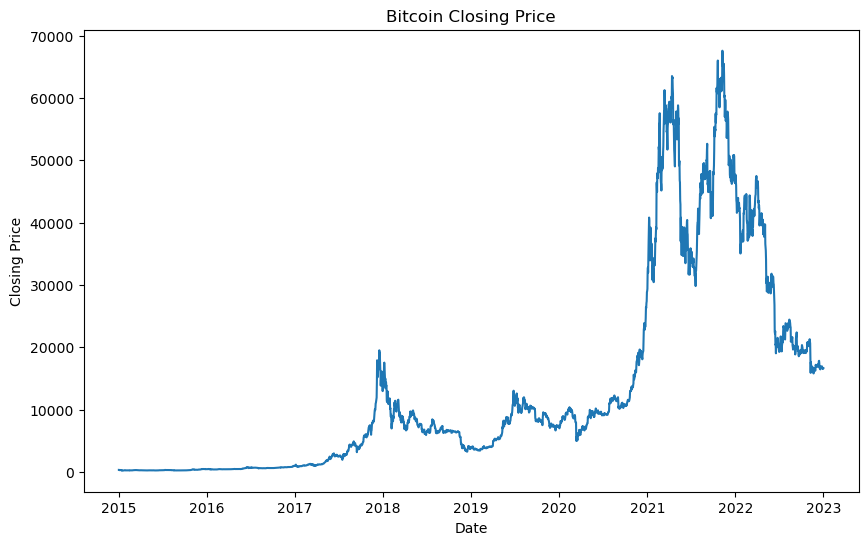

In [11]:
# plot the closing price of Bitcoin
plt.figure(figsize=(10, 6))
plt.title('Bitcoin Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(df['Close'])
plt.show()


<p align="center">The feature denoted as ‘Close’ is the focal point of our prognostication. We are procuring varied elements from the predetermined factors for our individual computation and labeling them appropriately. In addition, we are scrutinizing each factor in tandem with the ‘Close’ column whilst arranging it in a descending order.</p>

In [12]:
df["gap"] = (df["High"] - df["Low"]) * df["Volume"]
df["y"] = df["High"] / df["Volume"]
df["z"] = df["Low"] / df["Volume"]
df["a"] = df["High"] / df["Low"]
df["b"] = (df["High"] / df["Low"]) * df["Volume"]
abs(df.corr()["Close"].sort_values(ascending=False))


Close        1.000000
Adj Close    1.000000
High         0.999448
Low          0.999359
Open         0.998760
Volume       0.708461
b            0.693617
gap          0.562886
a            0.141166
z            0.404249
y            0.406262
Name: Close, dtype: float64

<p align='justify'>By examining the correlating variables, we have the ability to select a few of them. We shall omit High, Low, and Open due to their significant correlation from the outset. </p>

In [13]:
df = df[["Close", "Volume", "gap", "a", "b"]]
df.head()


,Close,Volume,gap,a,b
Date,,,,,
2015-01-01,314.248993,8036550,5.169115e+07,1.020484,8.201170e+06
2015-01-02,315.032013,7860650,1.787502e+07,1.007252,7.917656e+06
2015-01-03,281.082001,33054400,1.126097e+09,1.121203,3.706069e+07
2015-01-04,264.195007,55629100,1.647623e+09,1.114971,6.202486e+07
2015-01-05,274.473999,43962800,5.828143e+08,1.050011,4.616140e+07


Introducing the ARIMA model for Time Series Analysis. 
- ARIMA is a statistical model used for analyzing time series data.
- The acronym ARIMA stands for autoregressive integrated moving average model.
- The model is specified by three order parameters: p, d, and q.
- The parameter p represents the number of autoregressive terms in the model, which means the number of lagged values of the dependent variable that are included in the model.
- The parameter d represents the degree of differencing in the model, which means the number of times the data is differenced to make it stationary.
- The parameter q represents the number of moving average terms in the model, which means the number of lagged errors of the dependent variable that are included in the model.
- ARIMA is a non-seasonal model, which means it does not take into account any seasonal patterns in the data.
- SARIMAX is a seasonal ARIMA model that includes exogenous variables.
- The term "seasonal" in SARIMAX refers to the presence of seasonal patterns in the data, which are not captured by the non-seasonal ARIMA model.
- The exogenous variables in SARIMAX are additional variables that are not part of the time series being analyzed, but are believed to have an effect on the dependent variable.
- SARIMAX is specified by four order parameters: (p, d, q) for the non-seasonal part of the model, and (P, D, Q, s) for the seasonal part of the model, where P, D, and Q are similar to p, d, and q, but for the seasonal component, and s is the number of time periods in a season.

In [14]:
df2 = df.tail(30)
train = df2[:11]
test = df2[-19:]

print(train.shape, test.shape)


(11, 5) (19, 5)


The configuration of the train is represented by a tuple with dimensions of 11 by 5, while the evaluation is denoted by a tuple with dimensions of 19 by 5. Let us proceed with the implementation of the SARIMAX algorithm and analyze the outcomes.

## Model Development

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Importing the SARIMAX model class from statsmodels library

model = SARIMAX(endog=train["Close"], exog=train.drop("Close", axis=1), order=(2, 1, 1))

# Creating an instance of the SARIMAX model with the specified parameters
# endog: The endogenous variable (target variable) from the training data, here it is the "Close" column
# exog: The exogenous variables (features) from the training data, excluding the "Close" column
# order: The order of the autoregressive, differencing, and moving average components in the SARIMAX model

results = model.fit()

# Fitting the SARIMAX model to the training data, estimating and optimizing the model parameters

print(results.summary())

# Printing a summary of the SARIMAX model results
# This summary provides information about coefficient estimates, standard errors, p-values, and goodness-of-fit statistics
# It gives insights into the model's performance and the significance of its components



/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.40475D+00    |proj g|=  1.55420D+16

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      1     21      1     0     0   1.554D+16   6.405D+00
  F =   6.4047461869318845     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1

## Observe the prediction in time series.

In [16]:
start = 11
end = 29
predictions = results.predict(start=start, end=end, exog=test.drop("Close", axis=1))

# Setting the start and end indices for making predictions
# Here, the predictions will be made from the 11th index to the 29th index (inclusive)

# Calling the `predict()` method on the SARIMAX model (`results`)
# This generates predictions for the specified range of indices

# The `start` parameter specifies the starting index for predictions
# The `end` parameter specifies the ending index for predictions

# The `exog` parameter contains the exogenous variables (features) for prediction
# Here, it uses the test data with the "Close" column dropped, assuming it has the same structure as the training data

predictions

# Printing the predictions
# The variable `predictions` now contains the predicted values for the specified range of indices


2022-12-14    18309.339740
2022-12-15    17686.115980
2022-12-16    16826.516212
2022-12-17    17187.137775
2022-12-18    17245.835265
2022-12-19    16978.590137
2022-12-20    16773.805760
2022-12-21    17215.840669
2022-12-22    17139.887328
2022-12-23    17216.221716
2022-12-24    17264.994170
2022-12-25    17245.099826
2022-12-26    17249.217140
2022-12-27    17161.869372
2022-12-28    17094.877146
2022-12-29    17174.750292
2022-12-30    17093.701972
2022-12-31    17223.202466
2023-01-01    17247.363718
Freq: D, Name: predicted_mean, dtype: float64

## Plot the prediction

<Axes: xlabel='Date'>

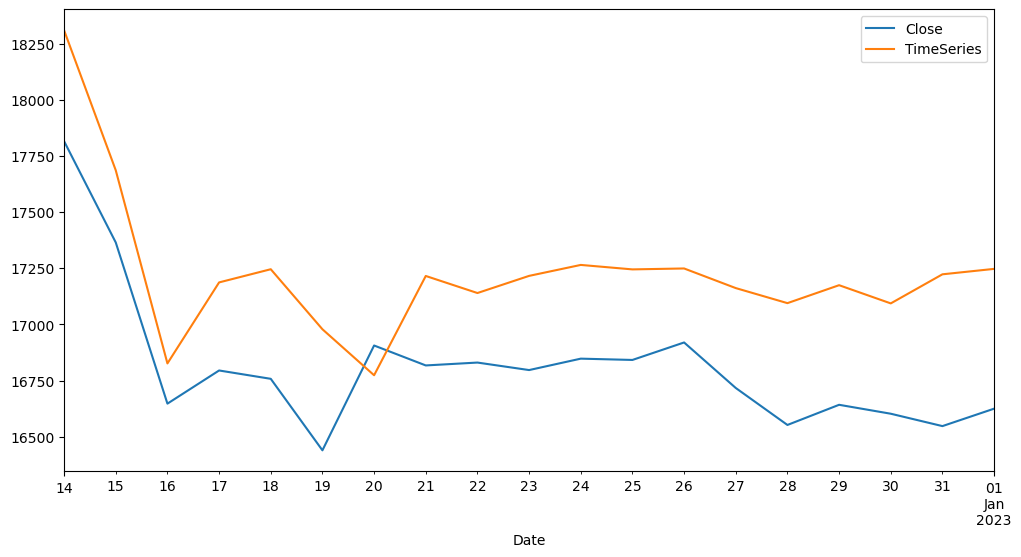

In [17]:
test["Close"].plot(legend=True, figsize=(12, 6))

# Plotting the "Close" column from the test data
# This line generates a line plot of the actual values from the test data
# The `legend=True` argument displays the legend on the plot
# The `figsize=(12, 6)` argument sets the size of the figure to (12, 6)

predictions.plot(label='TimeSeries', legend=True)

# Plotting the predicted values
# This line generates a line plot of the predicted values obtained earlier
# The `label='TimeSeries'` argument sets the label for the plot
# The `legend=True` argument displays the legend on the plot


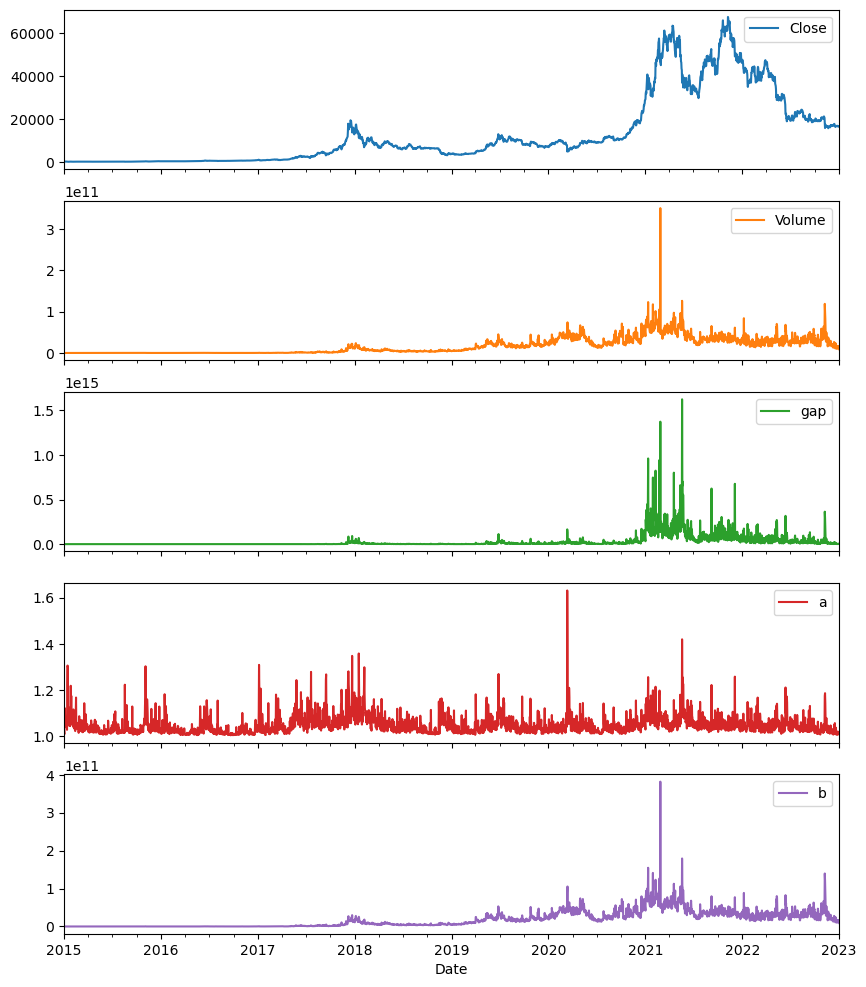

In [18]:
# plot all the column values in subplots
df.plot(subplots=True, figsize=(10, 12))
plt.show()
